# Импорты библиотек

In [ ]:
import cvxpy as cp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from collections import Counter

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Предварительный анализ и обработка данных

## Очистка датасета

Загрузим и просмотрим значения признаков для первых 5 значений из массива данных.

In [ ]:
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Для задачи бинарной классификации:
1. **diagnosis** - целевой класс при решении задачи машинного обучения и статистического анализа.
2. **id** - не используется для классификации, т.к. является уникальным параметром, не влияющим на целевой класс.
3. **Unnamed: 32** - не используется для классификации, т.к. не содержит данных.

Для дальнейшего анализа целевой класс вынесем в отдельный массив **y**. Из оставшихся признаков исключим неиспользуемые в классификации поля.

Количество оставшихся признаков для классификации: 30.

In [ ]:
col = data.columns
print(col)

y = data.diagnosis
list = ['Unnamed: 32', 'id', 'diagnosis']
x = data.drop(list, axis = 1)
x.head()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Убедимся, что в датасете отсутствуют пустые значения и выведем статистику по каждому из параметров.

In [ ]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500




---



## Гистограмма классов

Построим гистограмму распределения данных по 2 классам:
1. Злокачестввенные опухоли, обозначение - M, цвет на графиках - синий.
2. Доброкачественные опухоли, обозначение - B, цвет на графиках - зеленый.

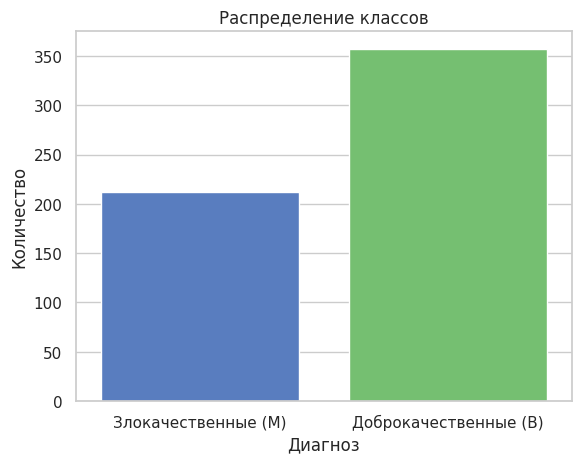


Злокачественные (M): 212
Доброкачественные (B): 357


In [ ]:
sns.set(style="whitegrid", palette="muted")
palette = sns.color_palette("muted")
custom_palette = [palette[0], palette[2]]

y_named = y.map({'M': 'Злокачественные (M)', 'B': 'Доброкачественные (B)'})

ax = sns.countplot(x=y_named, hue=y_named, palette=custom_palette, legend=False)
ax.set(title="Распределение классов", xlabel="Диагноз", ylabel="Количество")
plt.xticks(rotation=0)
plt.show()

B, M = y.value_counts()
print('\nЗлокачественные (M):', M)
print('Доброкачественные (B):', B)



---



## Диаграммы распределения данных

Далее будем строить скрипичную и роевую диаграмму для дальнейшего отбора признаков для обучения моделей и статистического анализа.

- Роевая диаграмма поможет определить, для каких признаков происходит более четкое разделение параметров.
- Скрипичная диаграмма поможет определить, какое значение принимает каждый признак с наибольшей частотой для каждого класса.

Для построение общего графика по нескольким параметрам - нормируем значения по каждому признаку.

In [ ]:
sns.set(style="whitegrid", palette="muted")
palette = sns.color_palette("muted")
custom_palette = [palette[0], palette[2]]

# Вывод графика
def configure_plot():
    plt.xticks(rotation=90)
    plt.xlabel("Признаки")
    plt.ylabel("Значение признака (нормированные)")
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles=handles, labels=["Злокачественные (M)", "Доброкачественные (B)"], title="Диагноз")
    plt.tight_layout()
    plt.show()

# Роевая диаграмма
def plot_swarmplot(data):
    plt.figure(figsize=(10, 10))
    sns.swarmplot(x="features", y="value", hue="diagnosis", data=data, palette=custom_palette)
    plt.title("Точечное распределение признаков")
    configure_plot()

# Скрипичная диаграмма.
def plot_violinplot(data):
    plt.figure(figsize=(10, 10))
    sns.violinplot(x="features", y="value", hue="diagnosis", data=data, split=True, inner="quart", palette=custom_palette)
    plt.title("Распределение признаков по квантилям")
    configure_plot()

In [ ]:
data_dia = y
data = x

# Нормировка
data_n_2 = (data - data.mean()) / data.std()

Сводные диаграммы первых 10 признаков.

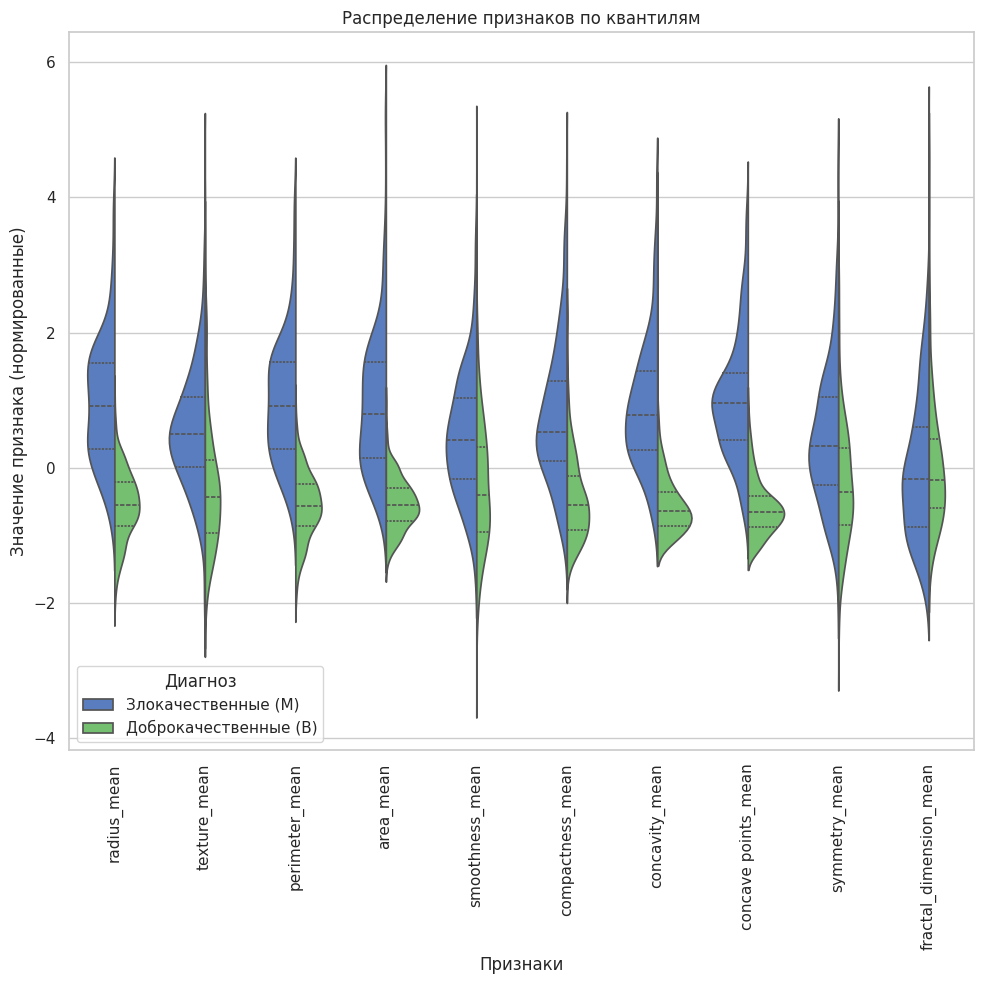

In [ ]:
data = pd.concat([y, data_n_2.iloc[:, :10]], axis=1)
data = pd.melt(data, id_vars="diagnosis", var_name="features", value_name="value")

plot_violinplot(data)

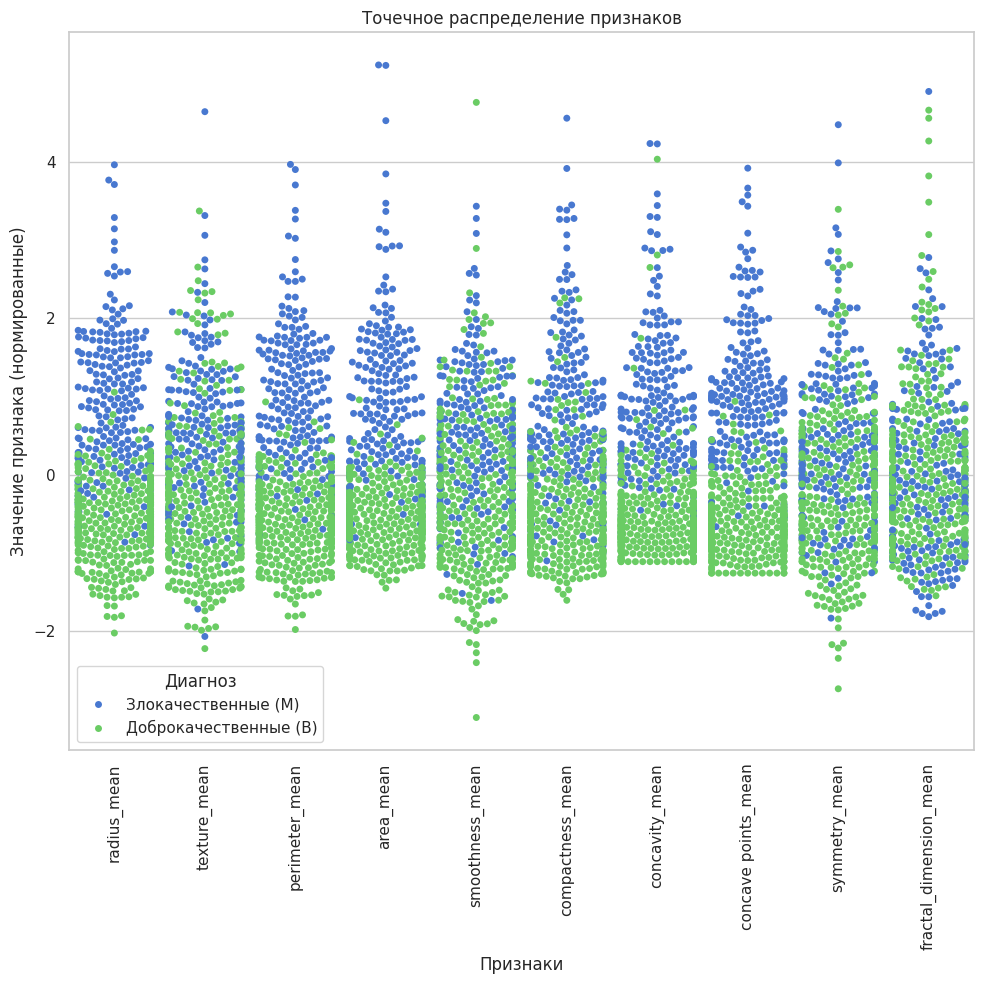

In [ ]:
plot_swarmplot(data)

Сводные диаграммы для признаков с 11 по 20.

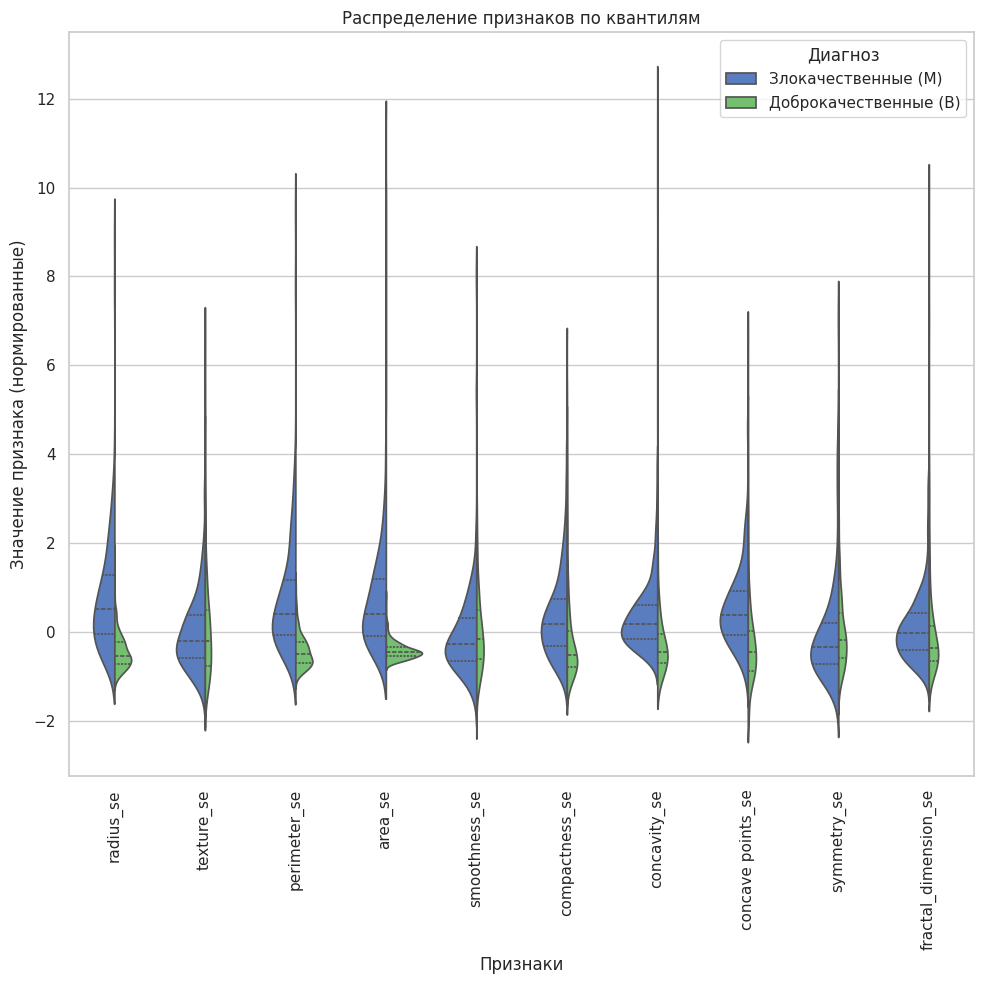

In [ ]:
data = pd.concat([y, data_n_2.iloc[:, 10:20]], axis=1)
data = pd.melt(data, id_vars="diagnosis", var_name="features", value_name="value")

plot_violinplot(data)

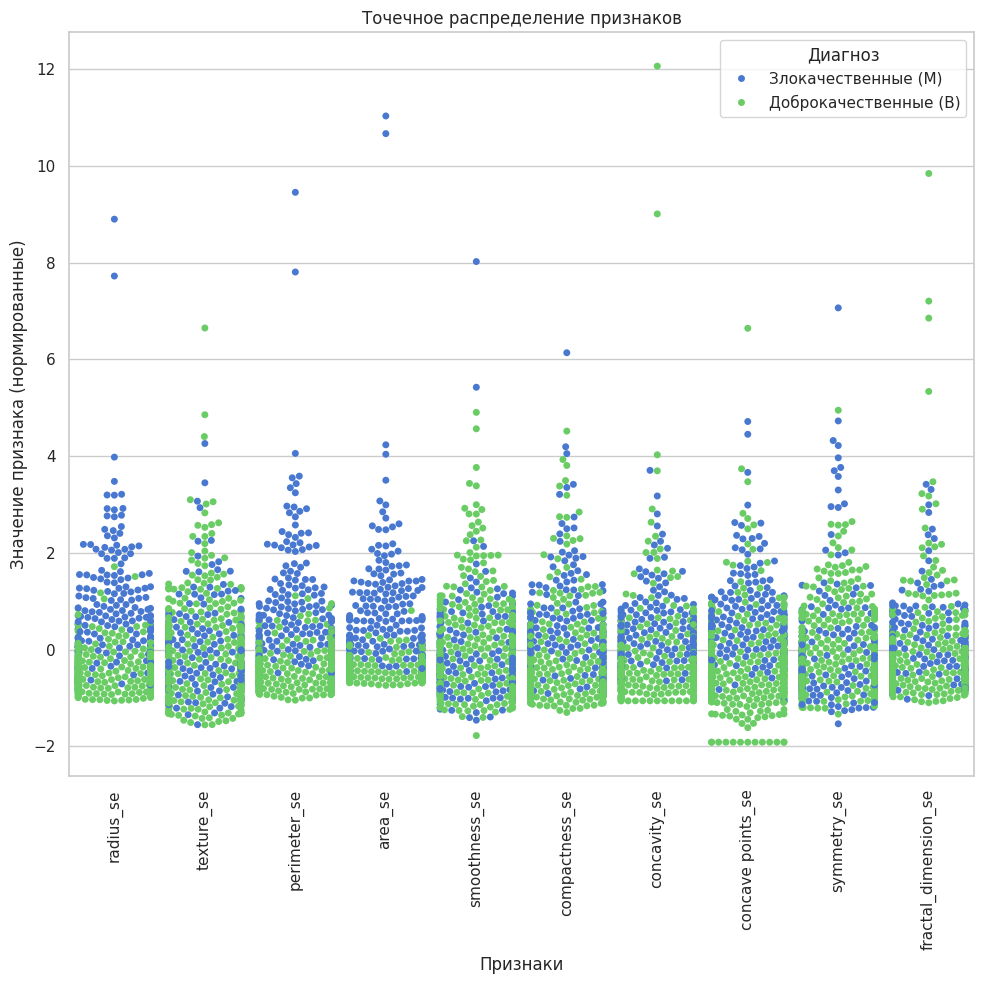

In [ ]:
plot_swarmplot(data)

Сводные диаграммы для признаков с 21 по 30.

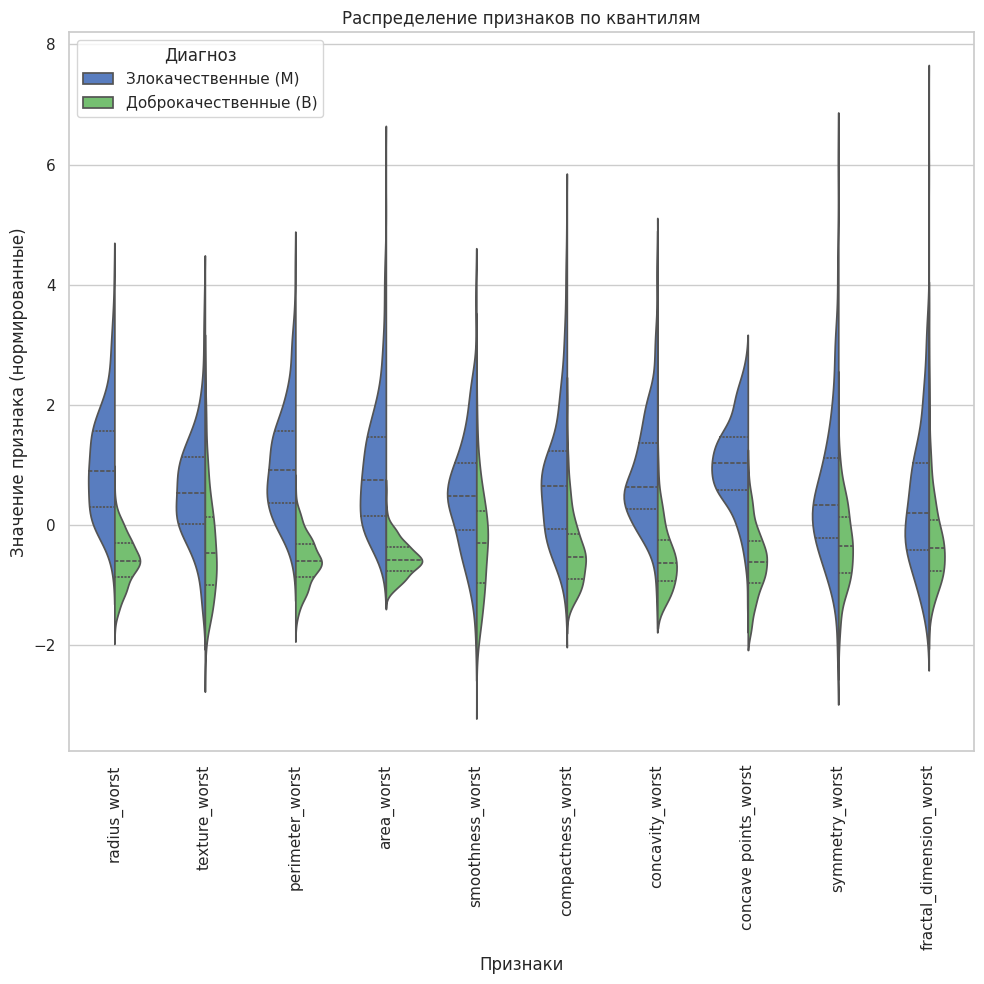

In [ ]:
data = pd.concat([y, data_n_2.iloc[:, 20:31]], axis=1)
data = pd.melt(data, id_vars="diagnosis", var_name="features", value_name="value")

plot_violinplot(data)

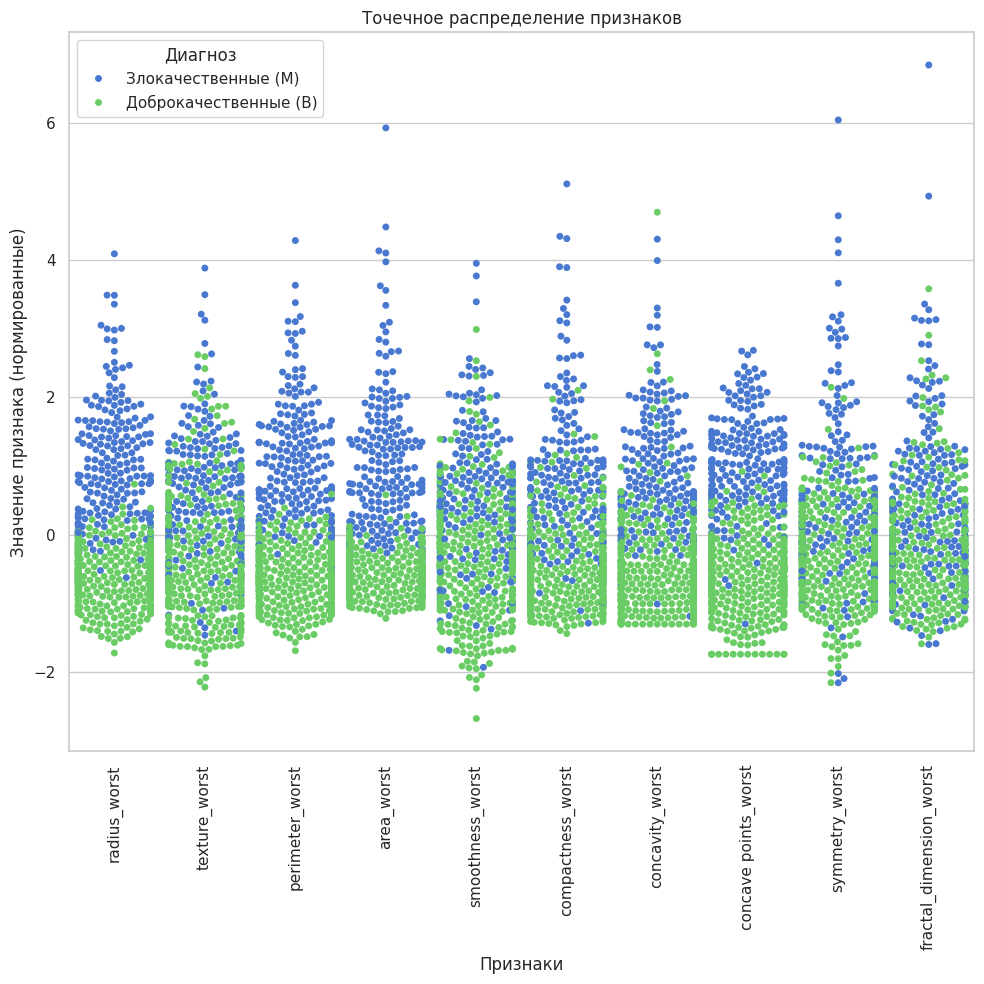

In [ ]:
plot_swarmplot(data)



---



## Корреляционные матрицы и отбрасывание признаков

Построим корреляционную матрицу для признаков, что бы понять, насколько они связаны и исключить сильно коррелирующие признаки.

Это уменьшит количество параметров для машинного обучения и статистического анализа без потери точности классификации.

<Axes: >

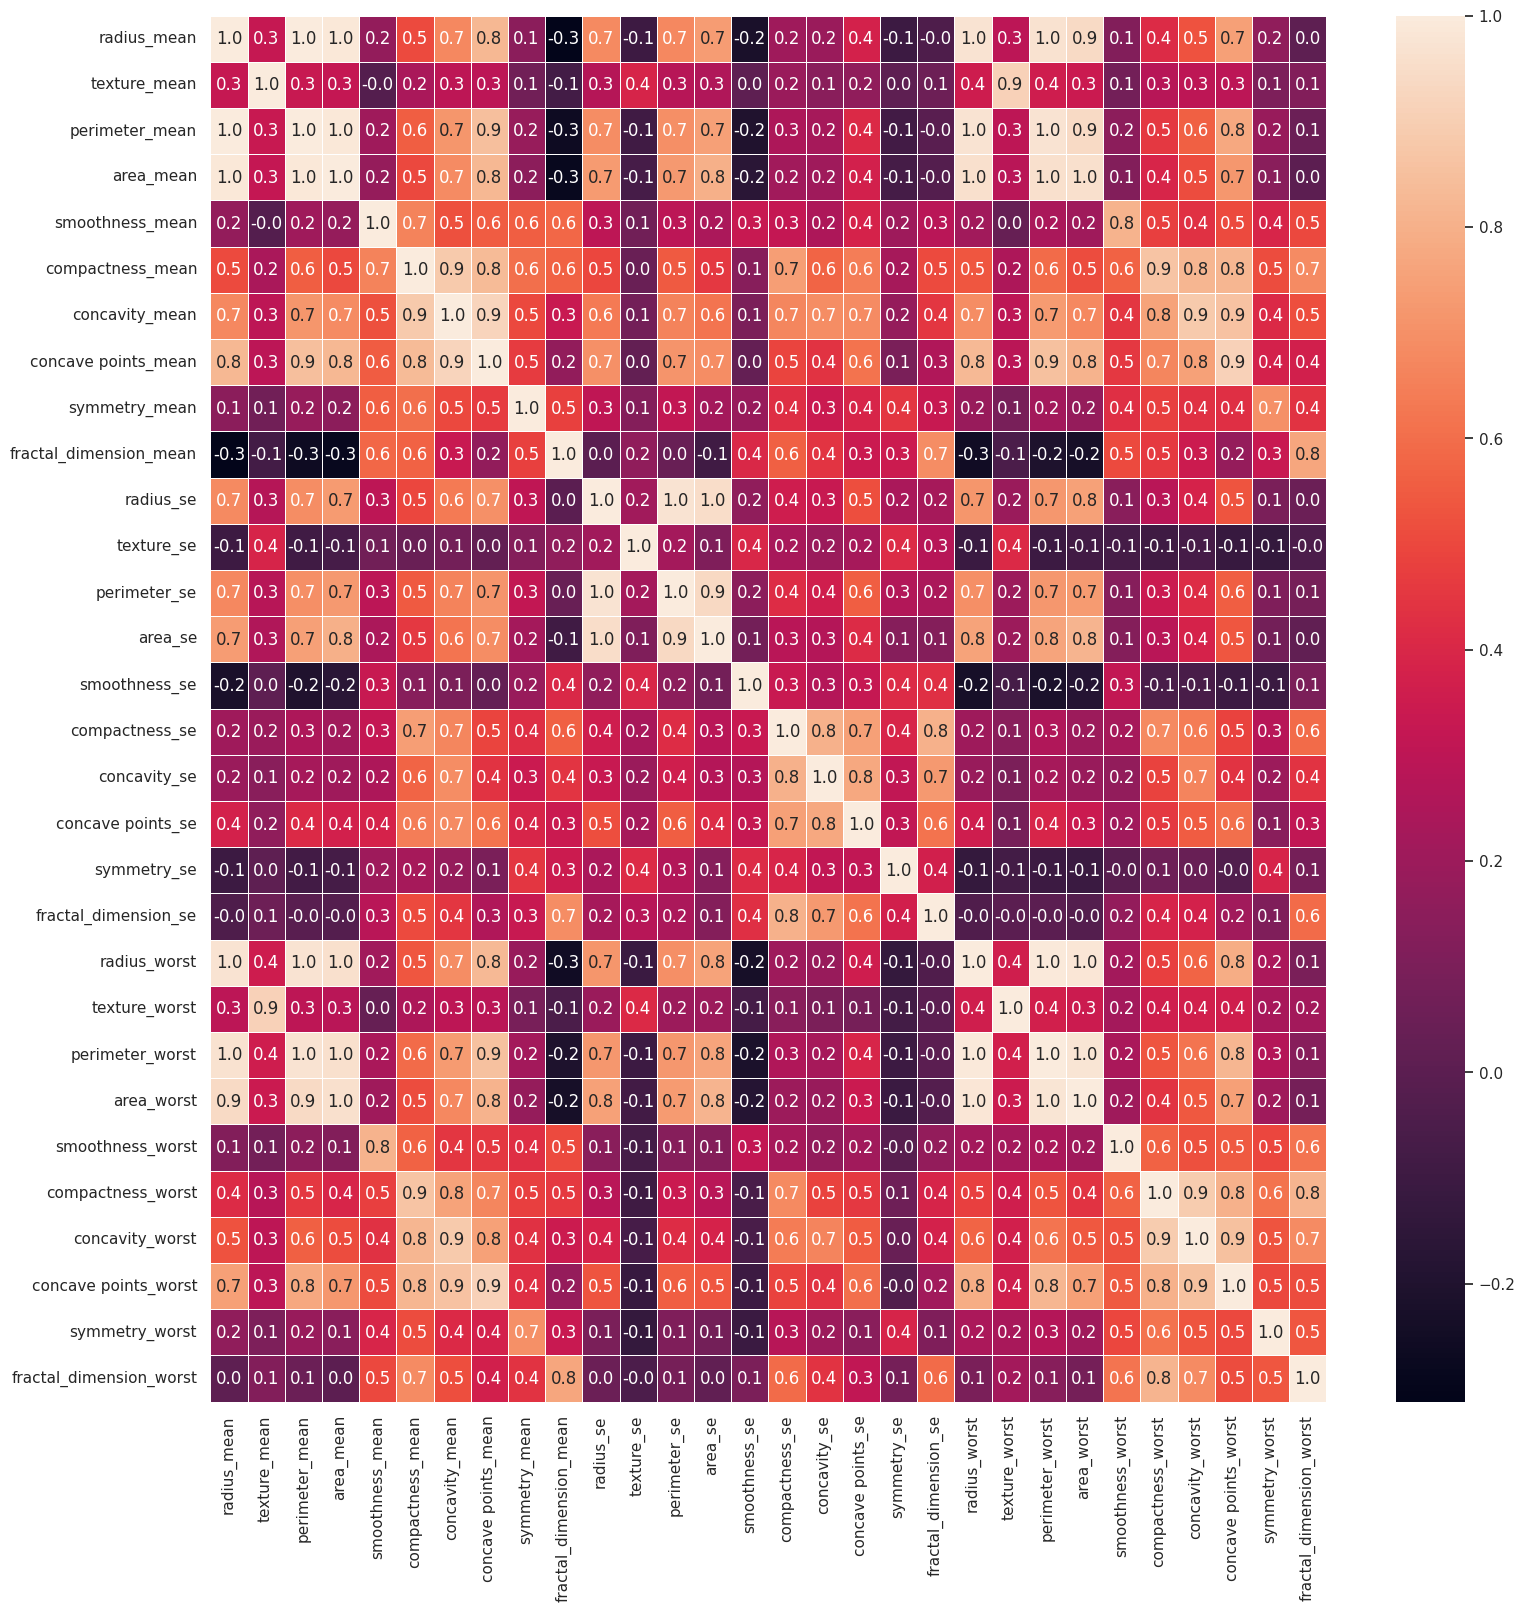

In [ ]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax)

Из корреляционной матрицы видно, что некоторые признаки сильно зависят друг от друга. В каждой группе коррелирующих признаков оставим по одному представителю. Выбирать оставшийся парметр будем на основе скрипичного и роевого графиков, приведенных выше.

Выберем признаки с наиболее четким разделением точек из разных классов.

1. radius_mean, perimeter_mean, area_mean → оставляем **area_mean**
2. compactness_mean, concavity_mean, concave points_mean → оставляем **concavity_mean**
3. radius_se, perimeter_se, area_se → оставляем **area_se**
4. radius_worst, perimeter_worst, area_worst → оставляем **area_worst**
5. compactness_worst, concavity_worst, concave points_worst → оставляем **concavity_worst**
6. compactness_se, concavity_se, concave points_se → оставляем **concavity_se**
7. texture_mean, texture_worst → оставляем **texture_mean**
8. area_worst и area_mean → оставляем **area_mean**

Оставшиеся параметры отбросим.

In [ ]:
drop_list1 = ['perimeter_mean', 'radius_mean', 'compactness_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'radius_worst',
              'perimeter_worst', 'compactness_worst', 'concave points_worst', 'compactness_se', 'concave points_se', 'texture_worst', 'area_worst']
x_1 = x.drop(drop_list1, axis = 1)
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


В новой корреляционной матрице не осталось сильно коррелирующих признаков, будем считать такой набор оптимальным.

<Axes: >

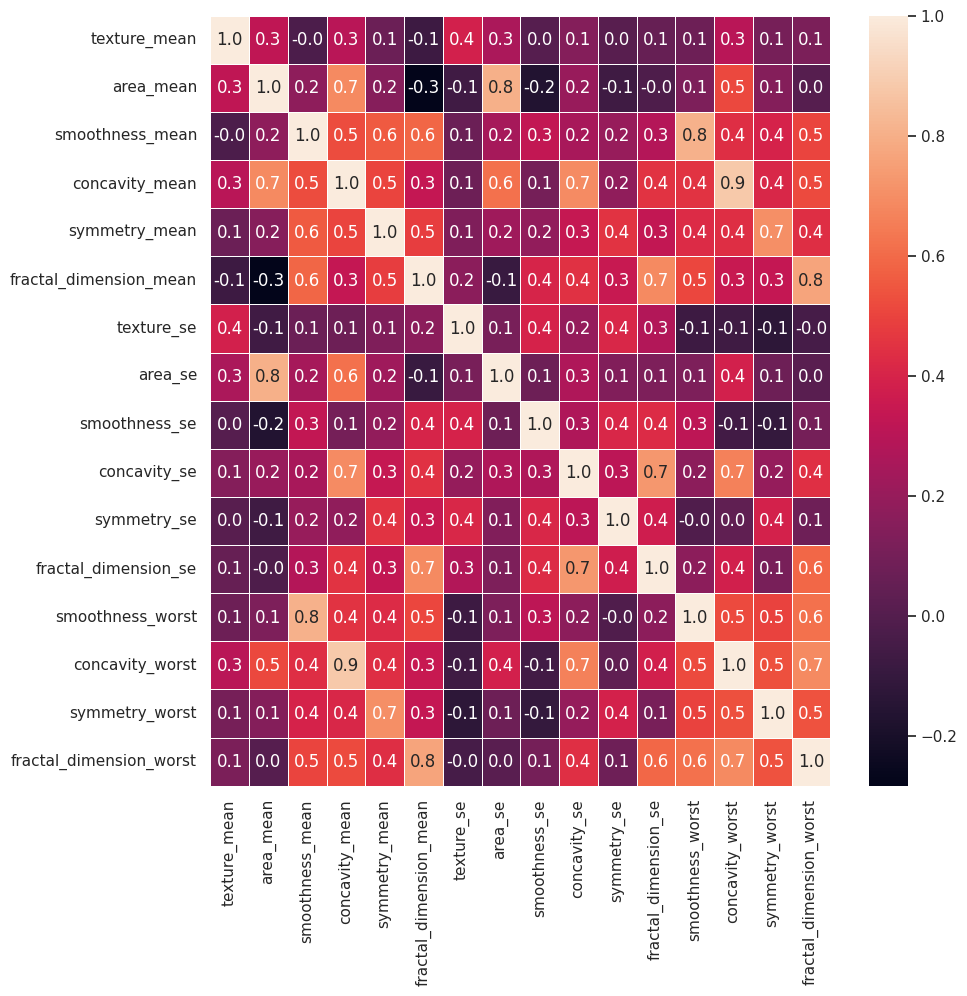

In [ ]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax)

# Машинное обучение

Разделим данные на тестовую и обучающую выборки в сооотношении 30% к 70%.

Для более точного обучения модели нормируем данные.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=9)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Random Forest

Реализуем обучение случайного леса "из коробки" с помощью библиотеки sklearn.
Это даст наиболее быструю реализацию с наибольшим количеством дополнительных возможностей.

Точность:  0.9707602339181286


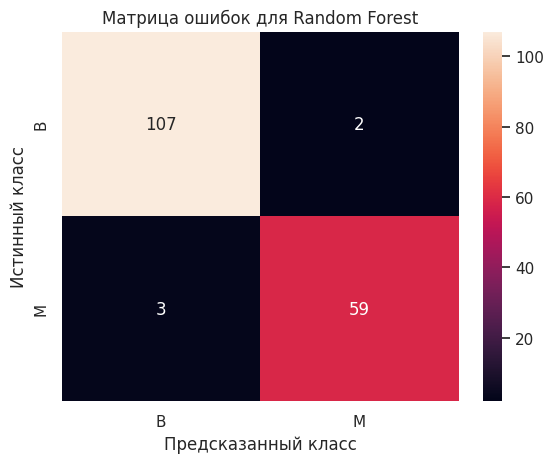

In [ ]:
clf_rf = RandomForestClassifier(random_state=9)
clr_rf = clf_rf.fit(x_train, y_train)

ac = accuracy_score(y_test, clf_rf.predict(x_test))

print('Точность: ', ac)
cm = confusion_matrix(y_test, clf_rf.predict(x_test))

sns.heatmap(cm, annot=True, fmt="d", xticklabels=["B", "M"], yticklabels=["B", "M"])
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок для Random Forest')
plt.show()

Для случайного леса возможно дополнительное сокращение количества используемых для классификации признаков. При этом при правильном подборе количества признаков точность метода не уменьшится.

Для удаления лишних признаков проанализируем значимость каждого из них.

In [ ]:
select_feature = SelectKBest(chi2, k=7).fit(x_train, y_train)

print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [5.02572725e+01 3.45719217e+04 1.13798371e-01 1.32904591e+01
 1.98234529e-01 6.94841071e-05 6.54027108e-03 5.41845121e+03
 1.58682045e-03 6.28706587e-01 3.65032836e-04 4.91973154e-03
 2.89888772e-01 2.54328082e+01 9.36178091e-01 1.50747679e-01]
Feature list: Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


7 наиболее значимых признаков:
1. area_mean
2. area_se
3. texture_mean
4. concavity_worst
5. concavity_mean
6. symmetry_worst
7. concavity_se

Повторно обучим модель, используя только эти признаки. Точность модели не изменится.

Точность:  0.9707602339181286


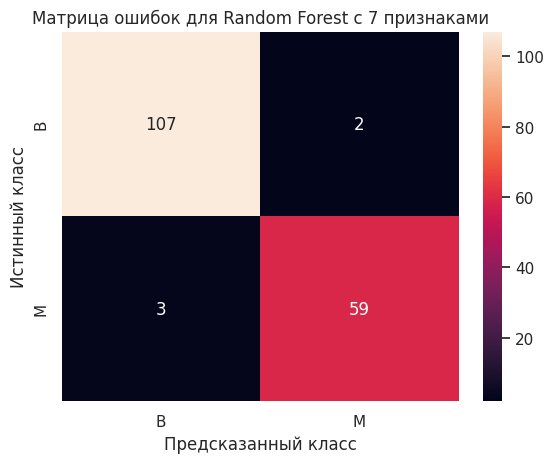

In [ ]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)

clf_rf_2 = RandomForestClassifier(random_state=9)
clr_rf_2 = clf_rf_2.fit(x_train_2, y_train)
ac_2 = accuracy_score(y_test, clf_rf_2.predict(x_test_2))

print('Точность: ', ac_2)
cm_2 = confusion_matrix(y_test, clf_rf_2.predict(x_test_2))

sns.heatmap(cm_2,annot=True, fmt="d", xticklabels=["B", "M"], yticklabels=["B", "M"])
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок для Random Forest c 7 признаками')
plt.show()



---



Реализуем собственный метод обучения для случайного леса.

Используется чистый Python, без ускорения через Cython и с рядом допущений для упрощения реализации (используются только базовые параметры, одинаковый размер выборок, голосование большинством, последовательное выполнение).

Точность: 0.9707602339181286


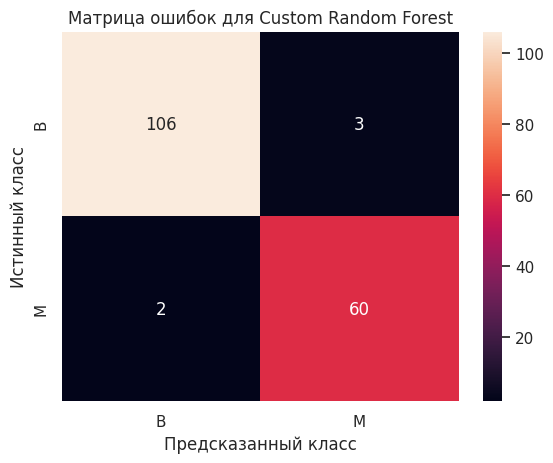

In [ ]:
# Узел дерева решений
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature      # Индекс признака для разделения
        self.threshold = threshold  # Порог разделения
        self.left = left            # Левая ветвь
        self.right = right          # Правая ветвь
        self.value = value          # Предсказанный класс (для листа)


# Функция для вычисления индекса Gini
def gini_index(y):
    counter = Counter(y)
    impurity = 1
    for count in counter.values():
        prob = count / len(y)
        impurity -= prob ** 2
    return impurity


# Класс для дерева решений
class DecisionTree:
    def __init__(self, max_depth=10, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split

    def fit(self, X, y):
        self.root = self._grow_tree(X, y, depth=0)

    def _grow_tree(self, X, y, depth):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))

        # Условия остановки
        if (depth >= self.max_depth or n_samples < self.min_samples_split or n_classes == 1):
            return Node(value=Counter(y).most_common(1)[0][0])

        # Случайный выбор признаков
        n_features_sqrt = int(np.sqrt(n_features))
        feature_indices = np.random.choice(n_features, n_features_sqrt, replace=False)

        # Поиск лучшего разбиения
        best_gain = -1
        best_feature, best_threshold = None, None
        for feature in feature_indices:
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] <= threshold
                right_indices = X[:, feature] > threshold

                if sum(left_indices) == 0 or sum(right_indices) == 0:
                    continue

                gain = self._information_gain(y, left_indices, right_indices)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = threshold

        if best_gain == -1:
            return Node(value=Counter(y).most_common(1)[0][0])

        # Разделение данных
        left_indices = X[:, best_feature] <= best_threshold
        right_indices = X[:, best_feature] > best_threshold
        left = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right = self._grow_tree(X[right_indices], y[right_indices], depth + 1)

        return Node(best_feature, best_threshold, left, right)

    def _information_gain(self, y, left_indices, right_indices):
        parent_gini = gini_index(y)
        n = len(y)
        n_left, n_right = sum(left_indices), sum(right_indices)
        if n_left == 0 or n_right == 0:
            return 0
        child_gini = (n_left / n) * gini_index(y[left_indices]) + (n_right / n) * gini_index(y[right_indices])
        return parent_gini - child_gini

    def predict(self, X):
        return np.array([self._predict_one(x, self.root) for x in X])

    def _predict_one(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature] <= node.threshold:
            return self._predict_one(x, node.left)
        return self._predict_one(x, node.right)


# Класс для случайного леса
class CustomRandomForest:
    def __init__(self, n_estimators=100, max_depth=10, min_samples_split=2, random_state=9):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.random_state = random_state
        self.trees = []

    def fit(self, X, y):
        np.random.seed(self.random_state)
        self.trees = []
        n_samples = X.shape[0]

        for _ in range(self.n_estimators):
            # Bootstrap-выборка
            indices = np.random.choice(n_samples, n_samples, replace=True)
            X_sample, y_sample = X[indices], y[indices]

            # Обучение дерева
            tree = DecisionTree(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        # Голосование большинством
        return np.apply_along_axis(lambda x: Counter(x).most_common(1)[0][0], axis=0, arr=predictions)


# Обучение CustomRandomForest
clf_rf = CustomRandomForest(n_estimators=100, max_depth=10, min_samples_split=2, random_state=9)
clf_rf.fit(x_train.values, y_train.values)

y_pred = clf_rf.predict(x_test.values)
ac = accuracy_score(y_test, y_pred)
print('Точность:', ac)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["B", "M"], yticklabels=["B", "M"])
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок для Custom Random Forest')
plt.show()

Кастомная реализация из-за упрощения алгоритма выполняется в несколько раз дольше. Точность на конкретной выборке не изменилась, однако при использовании выборки большего размера или с более сложными зависимостями - точность уменьшится.

## SVM

Реализуем обучение SVM "из коробки" с помощью библиотеки sklearn.
Это даст наиболее быструю реализацию с наибольшим количеством дополнительных возможностей.

*SVC - класс из библиотеки, реализующей SVM.*

Точность:  0.9824561403508771


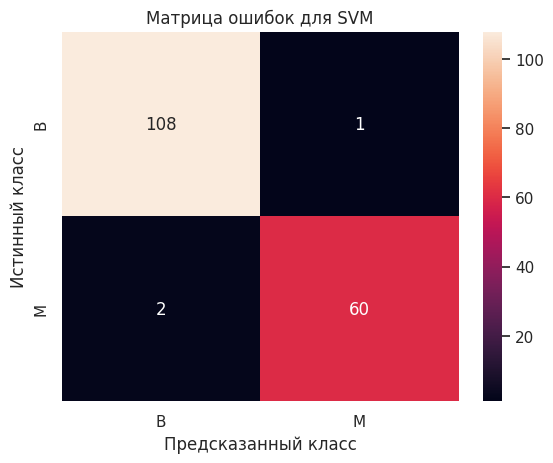

In [ ]:
clf_svm = SVC(C=10, gamma=0.01, kernel='rbf', random_state=9, class_weight='balanced', probability=True)
clf_svm.fit(x_train_scaled, y_train)

y_pred = clf_svm.predict(x_test_scaled)
ac = accuracy_score(y_test, y_pred)
print('Точность: ', ac)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", xticklabels=["B", "M"], yticklabels=["B", "M"])
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок для SVM')
plt.show()

Уменьшение количества параметров для SVM (по аналогии с Random Forest) возможно, но будет идейно отличаться.

В реализации выше используется нелинейное RBF ядро, что не позволяет свести задачу к оценке весов w_i в вектре w. Следовательно, для оценки значимости параметра будет использоваться градиент, что является отдельной задачей, требующей дополнительных вычислений.



---



Реализуем собственный метод обучения для метода оборных векторов.

Используется чистый Python, без ускорения через LIBSVM и с рядом допущений для упрощения реализации (поддерживает только ядро RBF, не может работать с ненормированными данным, использует cvxpy и не поддерживает параллелизм).

Точность: 0.9473684210526315


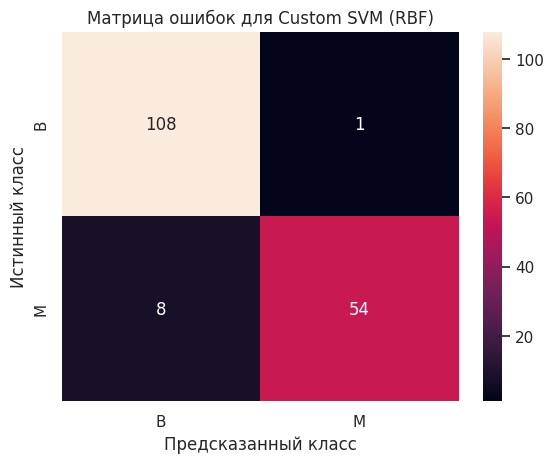

In [ ]:
class CustomRBFSVM:
    def __init__(self, C=10, gamma=0.1, random_state=9):
        self.C = C
        self.gamma = gamma
        self.random_state = random_state
        self.alphas = None           # Коэффициенты альфа для опорных векторов
        self.support_vectors = None  # Опорные вектора
        self.support_labels = None   # Метки опорных векторов
        self.b = None                # Смещение (bias)
        self.class_weights = None    # Веса классов

    def rbf_kernel(self, x1, x2):
        return np.exp(-self.gamma * np.sum((x1 - x2) ** 2))

    def fit(self, X, y):
        np.random.seed(self.random_state)
        n_samples = X.shape[0]
        y_ = np.where(y == 'M', 1, -1)  # Преобразование меток: 'B' → -1, 'M' → 1

        # Вычисление весов классов (аналог class_weight='balanced')
        class_counts = Counter(y)
        total_samples = len(y)
        self.class_weights = {
            'B': total_samples / (2 * class_counts['B']),
            'M': total_samples / (2 * class_counts['M'])
        }
        weights = np.where(y_ == 1, self.class_weights['M'], self.class_weights['B'])

        # Создание матрицы ядра
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = self.rbf_kernel(X[i], X[j])

        # Оптимизация с использованием cvxpy
        alphas = cp.Variable(n_samples)
        Y = np.outer(y_, y_)
        objective = cp.Maximize(cp.sum(cp.multiply(alphas, weights)) - 0.5 * cp.quad_form(alphas, Y * K))
        constraints = [alphas >= 0, alphas <= self.C * weights, cp.sum(cp.multiply(alphas, y_)) == 0]
        problem = cp.Problem(objective, constraints)
        problem.solve(solver=cp.SCS, max_iters=10000, eps=1e-5)

        # Проверка успешности оптимизации
        if problem.status != cp.OPTIMAL:
            raise ValueError(f"Оптимизация не удалась, статус: {problem.status}")

        self.alphas = alphas.value
        self.support_vectors = X
        self.support_labels = y_

        # Вычисление смещения (b) с учётом опорных векторов
        support_indices = self.alphas > 1e-5
        if not np.any(support_indices):
            raise ValueError("Опорные вектора не найдены. Возможно, оптимизация не удалась.")
        self.b = np.mean([
            y_[i] - sum(self.alphas[j] * y_[j] * K[i, j] for j in range(n_samples))
            for i in range(n_samples) if support_indices[i]
        ])

    def predict(self, X):
        y_pred = []
        for x in X:
            pred = sum(self.alphas[i] * self.support_labels[i] * self.rbf_kernel(x, self.support_vectors[i])
                       for i in range(len(self.support_vectors)) if self.alphas[i] > 1e-5) + self.b
            y_pred.append('M' if pred > 0 else 'B')
        return np.array(y_pred)


# Обучение CustomRBFSVM
clf_svm = CustomRBFSVM(C=10, gamma=0.1, random_state=9)
clf_svm.fit(x_train_scaled, y_train)

y_pred = clf_svm.predict(x_test_scaled)
ac = accuracy_score(y_test, y_pred)
print('Точность:', ac)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["B", "M"], yticklabels=["B", "M"])
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок для Custom SVM (RBF)')
plt.show()

Кастомная реализация из-за упрощения алгоритма выполняется в несколько раз дольше. Точность так же упала в силу собственной реализации балансировки классов и использования cvxpy.

# Статистические методы

Для дальнейшей работы нормируем данные и заменим категорильные метки на их численные значения.

In [ ]:
# Нормализуем данные
mean = np.mean(x_1, axis=0)  # Среднее по каждому признаку
std = np.std(x_1, axis=0)   # Стандартное отклонение по каждому признаку
# Избегаем деления на ноль
std = np.where(std == 0, 1, std)
X_scaled = ((x_1 - mean) / std).to_numpy()

y_scaled = y.map({'M': 1, 'B': 0}).to_numpy()

Разделим данные на тестовую и обучающую выборки в сооотношении 30% к 70%.

In [ ]:
# Разделим данные на тестовые и тренировочные
x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=9)

## Логистическая регрессия

In [ ]:
# сигмоидная функция
def sigmoid(z):
    return np.where(z >= 0,
                    1 / (1 + np.exp(-z)),
                    np.exp(z) / (1 + np.exp(z)))


# Функция логарифмической потери
def log_loss(X, y, weights, bias):
    N = len(y)
    z = X @ weights + bias
    y_pred = sigmoid(z)
    # Избегаем логарифма от 0
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    loss = - (1/N) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return loss

def gradient_descent(X, y, weights, bias, learning_rate, num_iterations):
    N = len(y)
    loss_history = []

    for _ in range(num_iterations):
        # Прямое распространение
        z = np.dot(X, weights) + bias
        y_pred = sigmoid(z)

        # Вычисление градиентов
        dz = y_pred - y
        dw = (1/N) * X.T @ dz
        db = (1/N) * np.sum(dz)

        # Обновление весов и смещения
        weights -= learning_rate * dw
        bias -= learning_rate * db

        # Сохранение значения функции потерь
        loss = log_loss(X, y, weights, bias)
        loss_history.append(loss)

    return weights, bias, loss_history

# Функция для предсказания
def predict(params, X, threshold=0.5):
    weights = params["weights"]
    bias = params["bias"]
    z = X @ weights + bias
    y_pred = sigmoid(z)
    return (y_pred >= threshold).astype(int)


def logistic_regression(X, y, learning_rate=0.01, num_iterations=1000):
    weights = np.zeros(X.shape[1])
    bias = 0

    weights, bias, loss_history = gradient_descent(X, y, weights, bias, learning_rate, num_iterations)

    return {"weights": weights, "bias": bias}

Точность:  0.9824561403508771


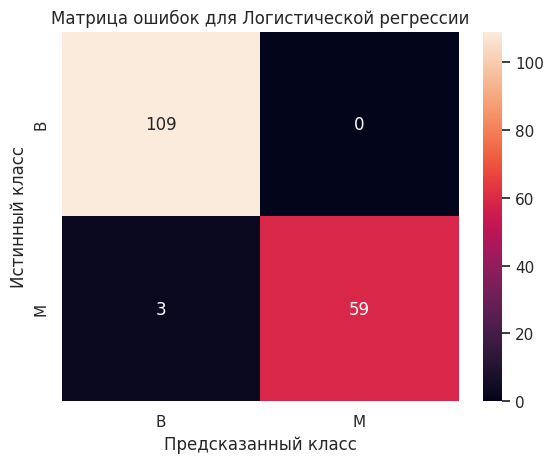

In [ ]:
log_reg_params = logistic_regression(x_train_scaled, y_train)

y_pred = predict(log_reg_params, x_test_scaled)

ac = accuracy_score(y_test, y_pred)
print('Точность: ', ac)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", xticklabels=["B", "M"], yticklabels=["B", "M"])
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок для Логистической регрессии')
plt.show()

Из полученного результата можно увидеть, что признаки в датасете хорошо описывают различия между классами, а параметры скорости обучения и количества итераций были выбраны оптимально.

## Линейный дискриминантный анализ (LDA)

Прежде чем реализовать LDA, необходимо проанализировать ковариационные матрицы классов.

Text(0.5, 1.0, 'Covariance Matrix for Class B')

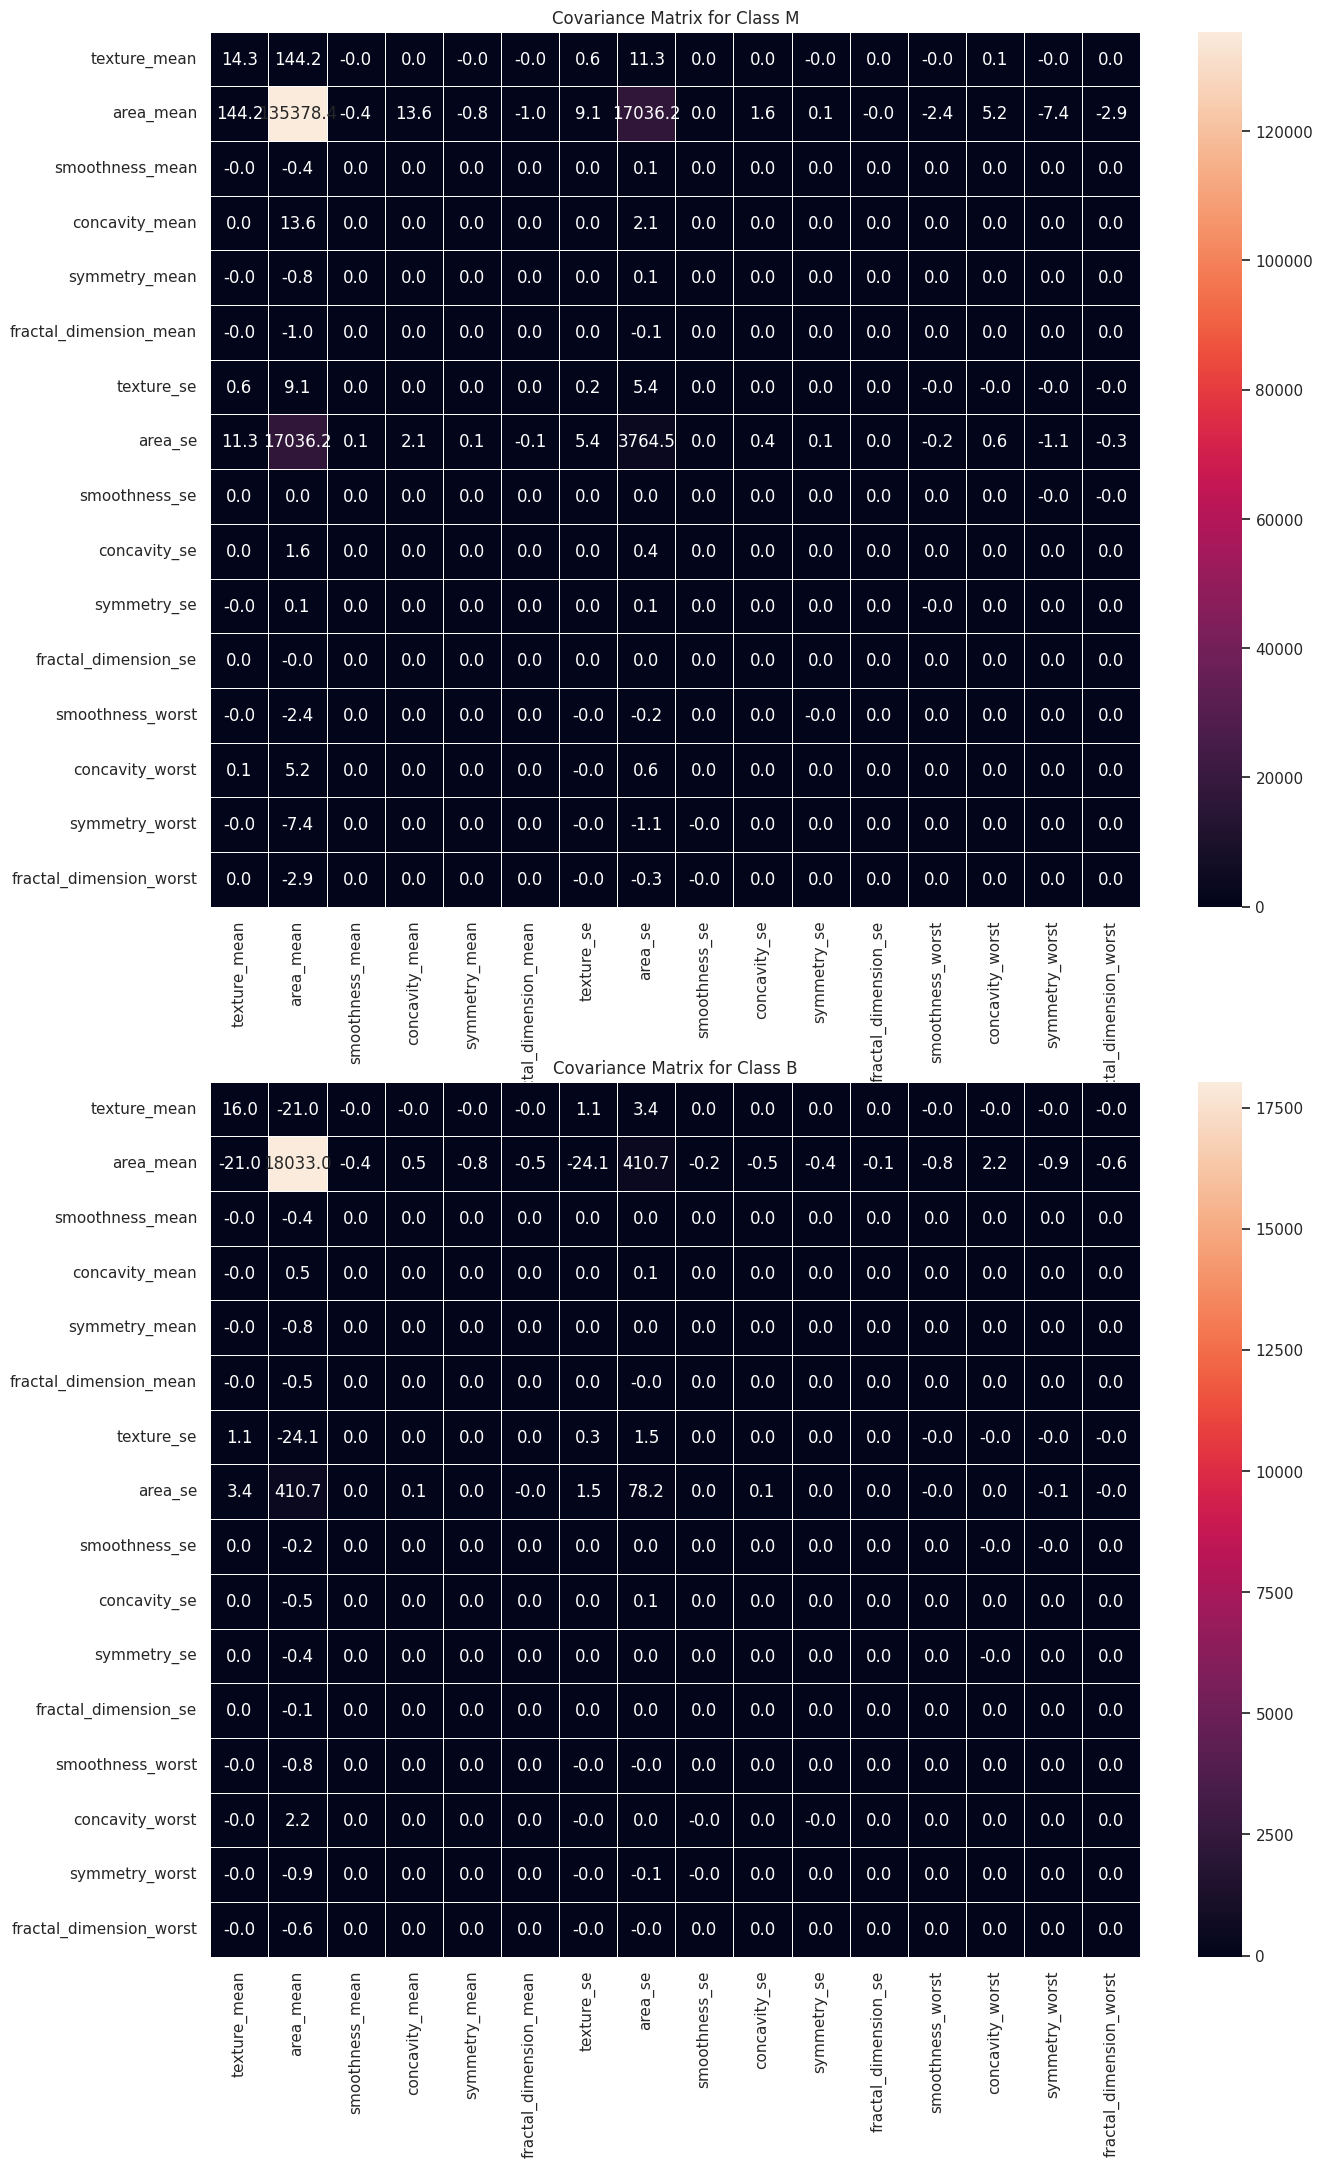

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 25), sharey=True)

cov_m = x_1[y == 'M'].cov()
cov_b = x_1[y == 'B'].cov()

sns.heatmap(cov_m, annot=True, linewidths=.5, fmt='.1f', ax=ax1)
ax1.set_title('Covariance Matrix for Class M')

sns.heatmap(cov_b, annot=True, linewidths=.5, fmt='.1f', ax=ax2)
ax2.set_title('Covariance Matrix for Class B')

In [ ]:
from scipy import stats

# Статистический тест Бокса для проверки равенства ковариационных матриц
def box_m_test(X1, X2):
    n1, n2 = X1.shape[0], X2.shape[0]
    p = X1.shape[1]

    # Вычисляем ковариационные матрицы
    S1 = np.cov(X1.T, bias=False)
    S2 = np.cov(X2.T, bias=False)

    # Объединённая ковариационная матрица
    S_pooled = ((n1 - 1) * S1 + (n2 - 1) * S2) / (n1 + n2 - 2)

    # Статистика теста Бокса
    M = (n1 + n2 - 2) * np.log(np.linalg.det(S_pooled)) - (n1 - 1) * np.log(np.linalg.det(S1)) - (n2 - 1) * np.log(np.linalg.det(S2))

    # Корректировочные коэффициенты
    c1 = (2 * p**2 + 3 * p - 1) / (6 * (p + 1) * (n1 + n2 - 2)) * (1 / (n1 - 1) + 1 / (n2 - 1) - 1 / (n1 + n2 - 2))
    c2 = (p - 1) * (p + 2) / (6 * (n1 + n2 - 2)) * (1 / (n1 - 1)**2 + 1 / (n2 - 1)**2 - 1 / (n1 + n2 - 2)**2)

    # Степени свободы
    df = p * (p + 1) / 2

    # Статистика с коррекцией
    F = (1 - c1) * M / (1 + c2)

    # p-value из распределения хи-квадрат
    p_value = 1 - stats.chi2.cdf(F, df)

    return F, p_value

In [ ]:
statistic, p_value = box_m_test(x_1[y == 'M'].values, x_1[y == 'B'].values)
print(f"\nBox's M Test:")
print(f"Statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Результат: Ковариационные матрицы статистически значимо различаются (p < 0.05).")
else:
    print("Результат: Нет статистически значимых различий между ковариационными матрицами (p >= 0.05).")


Box's M Test:
Statistic: 2578.6500
p-value: 0.0000
Результат: Ковариационные матрицы статистически значимо различаются (p < 0.05).


При сравнении матриц, кажется, что они схожи, однако статистический тест Бокса, показывает, что матрицы отличаются. Это может повлиять на точность классификации, так как метод полагает, что ковариационные матрицы одинаковы.

Методы дискриминантного анализа полагают, что данные каждого класса подчиняются многомерному нормальному распределению, поэтому проверим это с помощью теста Шапиро-Уилка.

In [ ]:
from scipy.stats import shapiro

# Функция для проверки нормальности
def check_normality(X, y, label):
    print(f"Checking normality for class {label}...")
    for col in X.columns:
        stat, p = shapiro(X[col][y == label])
        # print(f"Shapiro-Wilk for {col}: p-value = {p:.4f}")
        if p < 0.05:
            print(f"  Warning: {col} is not normally distributed (p < 0.05)")

check_normality(x_1, y, "M")
check_normality(x_1, y, "B")

Checking normality for class M...
Checking normality for class B...


Из результата видно, что многие признаки не подчиняются нормальному распределению, что так же может влиять на итоговую точность методов дискриминантного анализа.

In [ ]:
# Вычисление коэффициентов LDA
def lda_binary(X, y):
    # Разделяем данные по классам
    X0 = X[y == 0]
    X1 = X[y == 1]

    # Вычисляем средние для каждого класса
    mu0 = np.mean(X0, axis=0)
    mu1 = np.mean(X1, axis=0)

    # Вычисляем внутриклассовую ковариацию
    S_W = np.cov(X0.T, bias=True) * (len(X0) - 1) + np.cov(X1.T, bias=True) * (len(X1) - 1)
    S_W /= (len(X0) + len(X1) - 2)

    S_W_inv = np.linalg.inv(S_W)
    # Решаем задачу: w пропорционально S_W^(-1) * (mu1 - mu0)
    weights = S_W_inv @ (mu1 - mu0)

    # Априорные вероятности
    n0, n1 = len(X0), len(X1)
    pi0 = n0 / (n0 + n1)
    pi1 = n1 / (n0 + n1)

    # Смещение с учётом априорных вероятностей
    bias = -0.5 * (mu0.T @ S_W_inv @ mu0 - mu1.T @ S_W_inv @ mu1) + np.log(pi1 / pi0)

    return {"weights": weights, "bias": bias}

def predict_lda(params, X):
    weights = params["weights"]
    bias = params["bias"]

    scores = X @ weights + bias
    return (scores >= 0).astype(int)

Точность:  0.9473684210526315


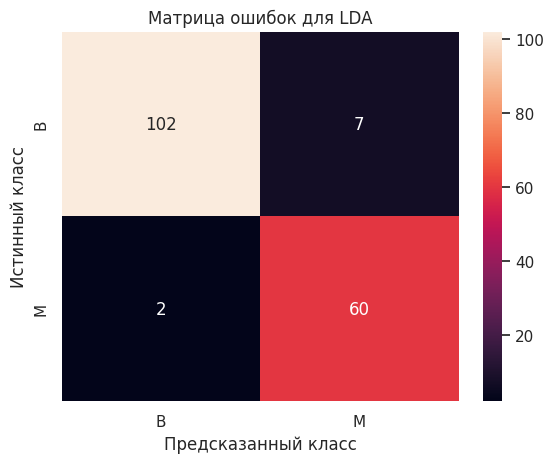

In [ ]:
lda_params = lda_binary(x_train_scaled, y_train)

y_pred = predict_lda(lda_params, x_test_scaled)

ac = accuracy_score(y_test, y_pred)
print('Точность: ', ac)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", xticklabels=["B", "M"], yticklabels=["B", "M"])
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок для LDA')
plt.show()

Результат оказался хуже, чем у логистической регрессии, что может быть связано с условием одинаковых ковариационных матриц. Однако метод остается конкурентоспособным, так как позволяет работать с большим числом классов, а также метод не требует дополнительной настройки параметров, таких скорость обучения и количество итераций.




---



Здесь можно увидеть границу классов для первых двух признаков и проверить попадание объектов в их области.

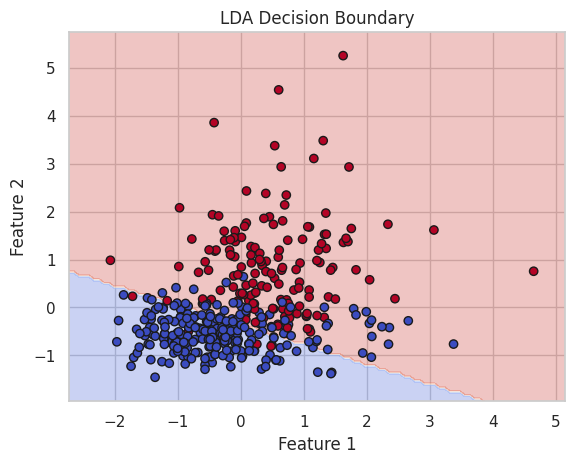

In [ ]:
# Визуализация разделяющей гиперплоскости (для 1 и 2 параметра)
import matplotlib.pyplot as plt

# Границы для графика
x_min, x_max = X_scaled[:, 0].min() - 0.5, X_scaled[:, 0].max() + 0.5
y_min, y_max = X_scaled[:, 1].min() - 0.5, X_scaled[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Предсказания для сетки
grid = np.c_[xx.ravel(), yy.ravel()]
Z = predict_lda({"weights": lda_params["weights"][:2], "bias": lda_params["bias"]}, grid).reshape(xx.shape)

# Построение графика
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(x_train_scaled[:, 0], x_train_scaled[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('LDA Decision Boundary')
plt.show()

## Квадратичный дискриминантный анализ

In [ ]:
# Квадратичный дискриминантный анализ
def qda_binary(X, y):
    # Разделяем данные по классам
    X0 = X[y == 0]
    X1 = X[y == 1]

    # Вычисляем средние
    mu0 = np.mean(X0, axis=0)
    mu1 = np.mean(X1, axis=0)

    # Вычисляем ковариационные матрицы
    Sigma0 = np.cov(X0.T, bias=True)
    Sigma1 = np.cov(X1.T, bias=True)

    # Априорные вероятности
    n0, n1 = len(X0), len(X1)
    pi0 = n0 / (n0 + n1)
    pi1 = n1 / (n0 + n1)

    return {
        'mu0': mu0, 'mu1': mu1,
        'Sigma0': Sigma0, 'Sigma1': Sigma1,
        'pi0': pi0, 'pi1': pi1
    }


def predict_qda(params, X):
    mu0, mu1 = params['mu0'], params['mu1']
    Sigma0, Sigma1 = params['Sigma0'], params['Sigma1']
    pi0, pi1 = params['pi0'], params['pi1']

    # Вычисляем обратные матрицы
    Sigma0_inv = np.linalg.inv(Sigma0)
    Sigma1_inv = np.linalg.inv(Sigma1)

    # Логарифмы определителей
    log_det_Sigma0 = np.log(np.linalg.det(Sigma0))
    log_det_Sigma1 = np.log(np.linalg.det(Sigma1))

    # Дискриминантные функции
    delta0 = np.zeros(X.shape[0])
    delta1 = np.zeros(X.shape[0])

    for i in range(X.shape[0]):
        x = X[i]
        delta0[i] = -0.5 * log_det_Sigma0 - 0.5 * (x - mu0).T @ Sigma0_inv @ (x - mu0) + np.log(pi0)
        delta1[i] = -0.5 * log_det_Sigma1 - 0.5 * (x - mu1).T @ Sigma1_inv @ (x - mu1) + np.log(pi1)

    return (delta1 >= delta0).astype(int)

Точность:  0.9649122807017544


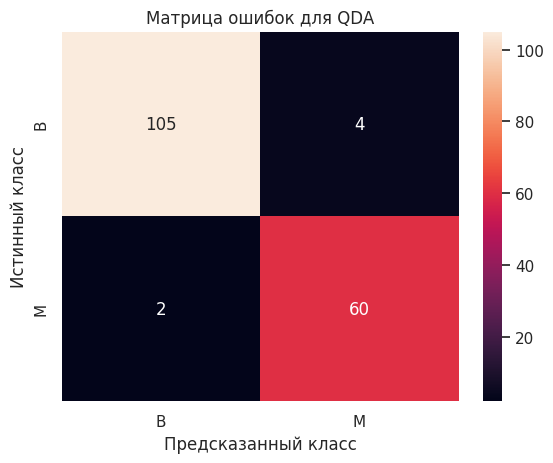

In [ ]:
qda_params = qda_binary(x_train_scaled, y_train)

y_pred = predict_qda(qda_params, x_test_scaled)

ac = accuracy_score(y_test, y_pred)
print('Точность: ', ac)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", xticklabels=["B", "M"], yticklabels=["B", "M"])
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок для QDA')
plt.show()

Результат точности оказался выше, чем у LDA, что говорит о том, что модель эффективно учитывает различия в ковариационных матрицах.